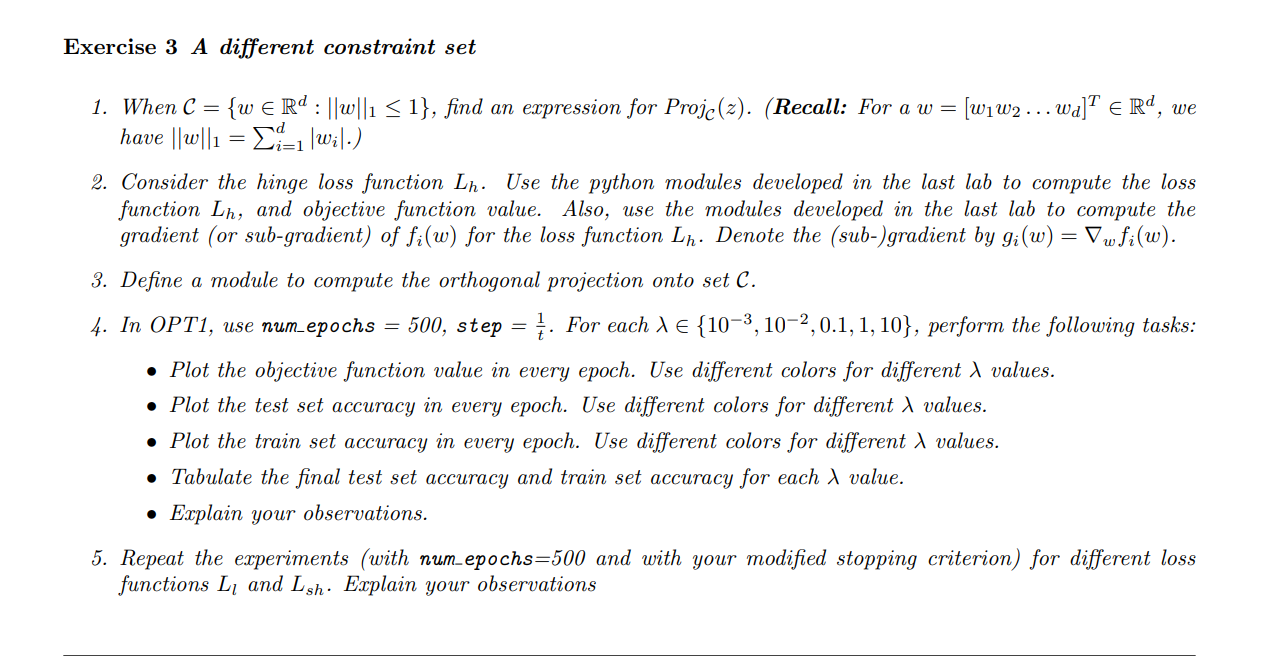

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from numpy import linalg as LA
from timeit import default_timer as timer
import math as M
import pandas as pd

In [2]:
from sklearn import datasets
np.random.seed(100)
wine = datasets.load_wine()
print("shape of feature data",wine.data.shape)
A = wine.data
print("shape of target data set",wine.target.shape)
C=np.unique(wine.target)
print("class label of data set",C)
n = wine.data.shape[0] #number of sample
d = wine.data.shape[1] #number of features
y = 1.0*np.ones([A.shape[0],])
for i in range(wine.target.shape[0]):
  if wine.target[i]==1:
    y[i] = 1
  else:
    y[i] = -1
y=y.reshape(n,1)

shape of feature data (178, 13)
shape of target data set (178,)
class label of data set [0 1 2]


In [3]:
# Get the minimum and maximum values for each column
min_values = np.min(A, axis=0)
max_values = np.max(A, axis=0)

# Normalize each column
A_normalized = -1 + 2 * (A - min_values) / (max_values - min_values)

In [4]:
indexarr = np.arange(n)
np.random.shuffle(indexarr)
print(indexarr)
p80=round(n*0.8)
q=list(indexarr[:p80])
r=list(indexarr[p80:])
train_data = (A_normalized[[q],:]).reshape(p80,d)
train_label = y[q].reshape(p80,1)
test_data = (A_normalized[[r],:]).reshape((n-p80),d)
test_label =y[r].reshape((n-p80),1)
print(train_data)

[ 88 159  11  74 158 149  99  96  90  95 134  65 171 165 169  15 145   7
  77  41 150  32 118  92  40   1  75 114  64 163 147  69  26  97 146 151
 111 119 170 142  29 152 136 167  46 174 177 139  20  31  28 102  44  59
 131 140  12  16 116  81  73 133  45 125  85 164 126  51  39  89  37   6
  54  25  21 101   9  23  35  82 122  62 123 117  19  55 115  22 157 160
  33 112 162  42 156 153  71   5  36  43  52  48 154 161 173  10 172  84
 110  70   3 127  76  57 128   0  78 124  83 120 148 104  50  68 168 155
  30 106  13  72  17  18  38 109  47 113  56  27  63 105 121   2  80 166
  61  49 135 175  91   4 100 141 129 132 108 130  86  93 137 144  58  60
 107 143 176  34  14  66  53  98  94 138  79  87 103  67  24   8]
[[-0.67894737 -0.47826087  0.17647059 ... -0.15447154  0.08424908
  -0.42653352]
 [ 0.28947368 -0.63241107  0.36898396 ... -0.85365854 -0.62637363
  -0.51212553]
 [ 0.62631579 -0.70750988  0.02673797 ...  0.12195122  0.13553114
   0.42938659]
 ...
 [-0.26842105 -0.28458498 -0.

In [5]:
def predict(w,x):
  h_x=np.sign(np.dot(x,w))
  return h_x

In [6]:
# def compute_accuracy(data,labels,model_w):
#   c = 0
#   n = len(data[0])
#   for i in range(n):
#     if predict(model_w, np.reshape(data[i], (np.shape(data)[1],1))) == labels[i]:
#       c = c +1
#   return c/n

In [7]:
def compute_accuracy(data,labels,model_w):
  prediction=predict(model_w,data)
  s=labels==prediction.reshape(len(labels),1)
  true_prediction = (s == True).sum()
  false_prediction = (s == False).sum()
  accuracy=true_prediction/len(s)
  return accuracy

In [8]:
# def compute_orthogonal_projection(z):
#     norm_1 = np.sum(np.abs(z))
#     if norm_1 <= 1:
#         return z.reshape(d,1)
#     else:
#         return (z / norm_1).reshape(d,1)

In [9]:
# def compute_orthogonal_projection(z):
#   sum_value=2 #sum(abs(z))
#   if sum_value>1:
#     print("shyam",sum_value)
#     new_u=z/sum_value
#   else:
#     new_u=z
#   return new_u

In [10]:
def compute_orthogonal_projection(z):
  sum_value=sum(abs(z))
  if sum_value>1:
    #print("shyam",sum_value)
    new_u=z/sum_value
  else:
    new_u=z
  return new_u

In [11]:
#z = np.array([1,0,0.9,6.9,-9.8,1.2,12,1,.4,.3,.5,4,6,])
#z=np.array([0.5,0.3,-0.7,0,0,0,0,0,0,0,0,0,0])
z=np.array([1,5])
# Compute the orthogonal projection onto C
projection = compute_orthogonal_projection(z)

print("Original vector z:", z)
print("Projection onto C:", projection)
# Compute the orthogonal projection onto C

Original vector z: [1 5]
Projection onto C: [0.16666667 0.83333333]


In [12]:
sum(projection)

1.0

In [13]:
def compute_loss_h(w,x,y):
  pk = x@w             #dp=np.dot(x,w)
  #print('shape of the yi:',y.shape)
  #print('shape of the pk',pk.shape)
  hinge_loss = np.mean([max(0, 1-y[i].T@pk[i]) for i in range(len(y))])
  #print('shape:', y[i].T@pk[i].shape)
  return hinge_loss

In [14]:
# def compute_objfnval(data,labels,model_w):
#   return np.mean(compute_loss_h(model_w,data,labels))+ (lamda/2)*np.linalg.norm(model_w,2)*2

In [15]:
def compute_objfnval(data,labels,model_w,lamda):
  #print('shape of the yi:')
  hinge_loss=compute_loss_h(model_w,data,labels)
  objectfun=(0.5*lamda*((model_w**2).sum()))/len(labels) + hinge_loss
  return objectfun

In [16]:
# def compute_grad_loss_h(x,y,model):
#   x = np.reshape(x,(d,1))
#   model_w = np.reshape(model, (d,1))
#   z = (y*np.matmul(model_w.T, x)).item()
#   if z >=1:
#     grad = (lamda/n)*model
#   if z <1:
#     grad = ((1/n)*(-y*x) + (lamda/n)*model)
#   return grad

In [17]:
def compute_grad_loss_h(xi,yi,model_w,i,lamda):
   grad_h=[]
   d=xi.shape[1]
  #  print("shape of the modekl w  : ",model_w.shape)
  #  print("xi ki shpae : ", xi.shape)
  #  print('shape of the yi: ', yi.shape)
   pk = xi@model_w   #np.transpose(w)
   condition = yi*pk;
   if(np.any(condition < 1)):
     grad_h=-((xi.T@yi).reshape(d,1))+lamda*model_w   #model_w.T
   elif np.all(condition >=1):
     grad_h=0+lamda*model_w/n
   return (grad_h.reshape(d,1))

In [18]:
# def OPT1(data,label,lamda, num_epochs):
#   t = 1
#   w = np.random.normal(0,0.1,(d,1))
#   arr = np.arange(data.shape[0])
#   fval_array = []
#   test_set_accuracy_array = []
#   train_set_accuracy_array = []
#   for epoch in range(num_epochs):
#     np.random.shuffle(arr)
#     for i in np.nditer(arr):
#       step = 1/(t)
#       w = compute_orthogonal_projection(w-step * compute_grad_loss_h(data[i], label[i], w))
#       t = t+1
#     fval_array.append(compute_objfnval(data,label,w))
#     test_set_accuracy_array.append(compute_accuracy(test_data,label,w))
#     train_set_accuracy_array.append(compute_accuracy(train_data,label,w))
#   return w, fval_array, test_set_accuracy_array, train_set_accuracy_array

In [19]:
# import matplotlib.pyplot as plt
# num_epochs = 500
# lambda_arr = [10**-3,0.01, 0.1, 1, 10]
# data = train_data
# label = train_label
# epochs = np.linspace(0,500,500)
# for lamda in lambda_arr:
#   w, fval_array, test_set_accuracy_array, train_set_accuracy_array = OPT1(data,label,lamda, num_epochs)
#   plt.plot(epochs, fval_array,label= r'$ $')
# plt.grid()
# plt.title('Graph of obj functions Vs Epoch values\n',fontsize=15)
# plt.xlabel(r'epoch',fontsize=15)
# plt.ylabel(r'L(z) (loss function)',fontsize=15)
# plt.legend(["$lambda=10**-3$", "lambda = 0.01","$lambda=0.1$", "$lambda=1$","$lambda=10$"],fontsize=14)
# plt.show()

In [20]:
def OPT1(data,label,lamda, num_epochs,test_data,test_label):
  t = 1
  d=data.shape[1]
  N=data.shape[0]
  objfun_val=[]
  test_acc=[]
  train_acc=[]
  w = np.zeros((d,1)).reshape(d,1)
  arr = np.arange(data.shape[0])
  for epoch in range(num_epochs):
    np.random.shuffle(arr)
    #print(w)
    for i in np.nditer(arr):
      # print('value od the w',w)
      # print('Epoch:', epoch)
      step=1/t
      g_i_x=compute_grad_loss_h(data,label,w,i,lamda)

      w=w-step*g_i_x
      #w=w.astype(np.float128)
      w=compute_orthogonal_projection(w)
      #print(w)
      #print("*"*50)
      #print('Epoch:', epoch, 'Sample:', i, 'Gradient:', g_i_x.T, 'Step size:', step)
      #print('Old w:', w1.T, 'New w:', w.T)
      #print('yeh le w',w)
      t = t+1
      #print('yeh le w',w)
      #print('value of t',t)
      #print('step lenght',step)
      #print('value od the w1', w1)
      if t>10000:
        t = 1
    objfun_val.append(compute_objfnval(data,label,w,lamda))
    test_acc.append(compute_accuracy(test_data,test_label,w))
    train_acc.append(compute_accuracy(data,label,w))
  return w,objfun_val,test_acc,train_acc

In [21]:
nepochs=50
lamda =  0.1


In [22]:
values=OPT1(train_data,train_label,lamda, nepochs,test_data,test_label)

In [23]:
values[-2]

[0.9166666666666666,
 0.9166666666666666,
 0.9166666666666666,
 0.9166666666666666,
 0.9166666666666666,
 0.9166666666666666,
 0.9166666666666666,
 0.9166666666666666,
 0.9166666666666666,
 0.9166666666666666,
 0.9166666666666666,
 0.9166666666666666,
 0.9166666666666666,
 0.9166666666666666,
 0.9166666666666666,
 0.9166666666666666,
 0.9166666666666666,
 0.9166666666666666,
 0.9166666666666666,
 0.9166666666666666,
 0.9166666666666666,
 0.9166666666666666,
 0.9166666666666666,
 0.9166666666666666,
 0.9166666666666666,
 0.9166666666666666,
 0.9166666666666666,
 0.9166666666666666,
 0.9166666666666666,
 0.9166666666666666,
 0.9166666666666666,
 0.9166666666666666,
 0.9166666666666666,
 0.9166666666666666,
 0.9166666666666666,
 0.9166666666666666,
 0.9166666666666666,
 0.9166666666666666,
 0.9166666666666666,
 0.9166666666666666,
 0.9166666666666666,
 0.9166666666666666,
 0.9166666666666666,
 0.9166666666666666,
 0.9166666666666666,
 0.9166666666666666,
 0.9166666666666666,
 0.9166666666

In [24]:
#values=OPT1(train_data,train_label,lamda, nepochs,test_data,test_label)

In [25]:
nepochs=500
lamda = [10**(-3), 10**(-2), 0.1, 1, 10]
object_epoch_lamda=[]
test_acc_epoch_lamda=[]
final_train_acc=[]
final_test_acc=[]
train_acc_epoch_lamda=[]
for i in range(len(lamda)):
  values=OPT1(train_data,train_label,lamda[i], nepochs,test_data,test_label)
  object_epoch_lamda.append(values[1])
  test_acc_epoch_lamda.append(values[2])
  train_acc_epoch_lamda.append(values[3])
  final_test_acc.append(compute_accuracy(test_data,test_label,values[0]))
  final_train_acc.append(compute_accuracy(train_data,train_label,values[0]))
obj_val_epoch_lamda=np.array(object_epoch_lamda)
test_accuracy_epoch_lamda=np.array(test_acc_epoch_lamda)
train_accuracy_epoch_lamda=np.array(train_acc_epoch_lamda)

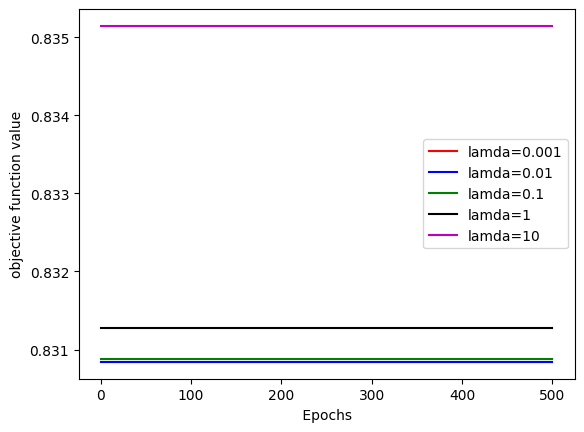

In [26]:
epochs=np.arange(1,501,1)
plt.plot(epochs, obj_val_epoch_lamda[0],  color='r', label='lamda=0.001')
plt.plot(epochs, obj_val_epoch_lamda[1],  color='b', label='lamda=0.01')
plt.plot(epochs, obj_val_epoch_lamda[2],  color='g', label='lamda=0.1')
plt.plot(epochs, obj_val_epoch_lamda[3],  color='k', label='lamda=1')
plt.plot(epochs, obj_val_epoch_lamda[4],  color='m', label='lamda=10')


plt.xlabel(" Epochs ")
plt.ylabel("objective function value")
plt.legend()

plt.show()

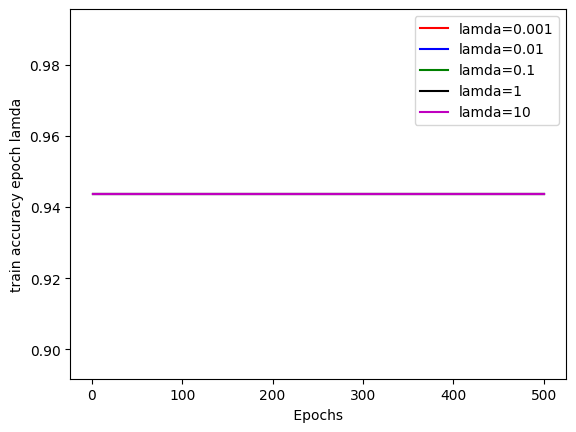

In [27]:
epochs=np.arange(1,501,1)
plt.plot(epochs, train_acc_epoch_lamda[0],  color='r', label='lamda=0.001')
plt.plot(epochs, train_acc_epoch_lamda[1],  color='b', label='lamda=0.01')
plt.plot(epochs, train_acc_epoch_lamda[2],  color='g', label='lamda=0.1')
plt.plot(epochs, train_acc_epoch_lamda[3],  color='k', label='lamda=1')
plt.plot(epochs, train_acc_epoch_lamda[4],  color='m', label='lamda=10')

plt.xlabel(" Epochs ")
plt.ylabel("train accuracy epoch lamda")
plt.legend()

plt.show()

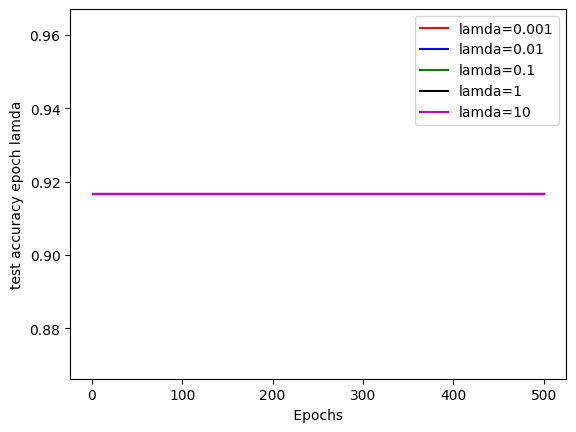

In [28]:
epochs=np.arange(1,501,1)
plt.plot(epochs, test_acc_epoch_lamda[0],  color='r', label='lamda=0.001')
plt.plot(epochs, test_acc_epoch_lamda[1],  color='b', label='lamda=0.01')
plt.plot(epochs, test_acc_epoch_lamda[2],  color='g', label='lamda=0.1')
plt.plot(epochs, test_acc_epoch_lamda[3],  color='k', label='lamda=1')
plt.plot(epochs, test_acc_epoch_lamda[4],  color='m', label='lamda=10')
plt.xlabel(" Epochs ")
plt.ylabel("test accuracy epoch lamda")
plt.legend()
plt.show()

In [29]:
data=[]
for i in range(len(lamda)):
  data.append([lamda[i],final_test_acc[i],final_train_acc[i]])

In [30]:
df = pd.DataFrame(data, columns = ['lamda values','final test acc','final train acc'])
df

lamda values  final test acc  final train acc
0         0.001        0.916667         0.943662
1         0.010        0.916667         0.943662
2         0.100        0.916667         0.943662
3         1.000        0.916667         0.943662
4        10.000        0.916667         0.943662

In [31]:
def compute_loss_L(x,y,w):
  dp=np.dot(x,w)
  logistic_loss = np.mean([np.log(1+np.exp(-(y[i]*dp[i]))) for i in range(len(y))])
  return logistic_loss


In [32]:
def compute_objfnval_L(data,labels,model_w,lamda):
  logistic_loss=compute_loss_L(data,labels,model_w)
  objectfun=(0.5*lamda*((model_w**2).sum()))/len(labels) + logistic_loss
  return objectfun

In [33]:
def compute_grad_loss_L(x,y,w,i,lamda):
  dp=np.dot(x[i],w)
  d=x.shape[1]
  gradL=(((1+np.exp(-(y[i]*dp)))**(-1))*(np.exp(-(y[i]*dp))))*(x[i])*y[i]
  return (gradL.reshape(d,1))/len(y)

In [34]:
def OPT1_L(data,label,lamda, num_epochs,test_data,test_label):
  t = 1
  d=data.shape[1]
  N=data.shape[0]
  obj_fun_val=[]
  test_acc=[]
  train_acc=[]
  w = np.zeros((d,1)).reshape(d,1)
  arr = np.arange(N)
  for epoch in range(num_epochs):
    np.random.shuffle(arr)
    for i in np.nditer(arr):
      step=1/t
      g_i_x=compute_grad_loss_L(data,label,w,i,lamda)
      w1=w-step*g_i_x
      w=compute_orthogonal_projection(w1)
      t = t+1
      if t>10000:
        t = 1
    obj_fun_val.append(compute_objfnval_L(data,label,w,lamda))
    test_acc.append(compute_accuracy(test_data,test_label,w))
    train_acc.append(compute_accuracy(data,label,w))
  return w1,obj_fun_val,test_acc,train_acc


In [35]:
nepochs=500
lamda = [10**(-3), 10**(-2), 0.1, 1, 10]
objval_epoch_lamda=[]
test_acc_epoch_lamda=[]
final_train_acc=[]
final_test_acc=[]
train_acc_epoch_lamda=[]
for i in range(len(lamda)):
  values1,values2,values3,values4=OPT1_L(train_data,train_label,lamda[i], nepochs,test_data,test_label)
  objval_epoch_lamda.append(values2)
  test_acc_epoch_lamda.append(values3)
  train_acc_epoch_lamda.append(values4)
  final_test_acc.append(compute_accuracy(test_data,test_label,values1))
  final_train_acc.append(compute_accuracy(train_data,train_label,values1))
# obj_val_epoch_lamda=np.array(obj_val_epoch_lamda)  #reshape(5,1000)
# test_acc_epoch_lamda=np.array(test_accuracy_epoch_lamda) #reshape(5,1000)
# train_acc_epoch_lamda=np.array(train_accuracy_epoch_lamda) #reshape(5,1000)

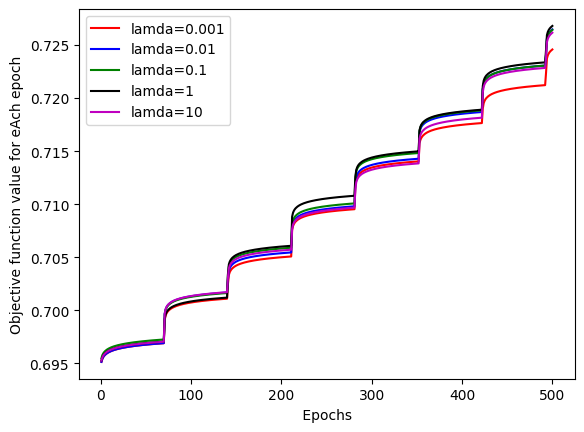

In [36]:
epochs=np.arange(1,501,1)
plt.plot(epochs, objval_epoch_lamda[0],  color='r', label='lamda=0.001')
plt.plot(epochs, objval_epoch_lamda[1],  color='b', label='lamda=0.01')
plt.plot(epochs, objval_epoch_lamda[2],  color='g', label='lamda=0.1')
plt.plot(epochs, objval_epoch_lamda[3],  color='k', label='lamda=1')
plt.plot(epochs, objval_epoch_lamda[4],  color='m', label='lamda=10')


plt.xlabel(" Epochs ")
plt.ylabel("Objective function value for eAch epoch")
plt.legend()

plt.show()

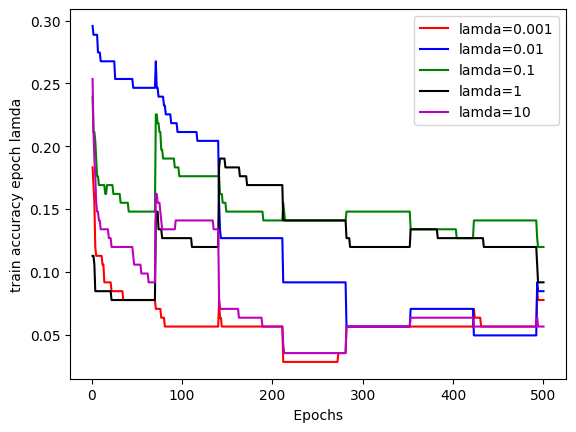

In [37]:
epochs=np.arange(1,501,1)
plt.plot(epochs, train_acc_epoch_lamda[0],  color='r', label='lamda=0.001')
plt.plot(epochs, train_acc_epoch_lamda[1],  color='b', label='lamda=0.01')
plt.plot(epochs, train_acc_epoch_lamda[2],  color='g', label='lamda=0.1')
plt.plot(epochs, train_acc_epoch_lamda[3],  color='k', label='lamda=1')
plt.plot(epochs, train_acc_epoch_lamda[4],  color='m', label='lamda=10')
plt.xlabel(" Epochs ")
plt.ylabel("train accuracy epoch lamda")
plt.legend()
plt.show()

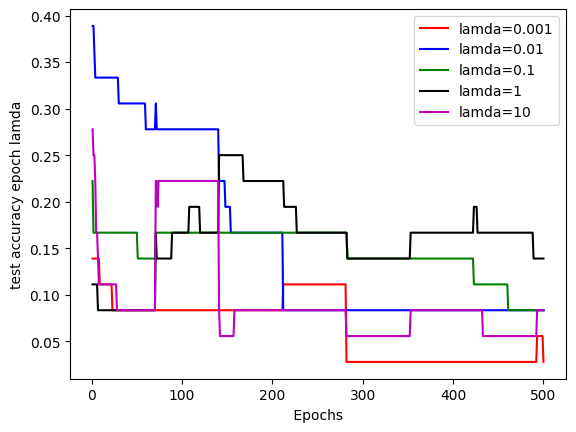

In [38]:
epochs=np.arange(1,501,1)
plt.plot(epochs, test_acc_epoch_lamda[0],  color='r', label='lamda=0.001')
plt.plot(epochs, test_acc_epoch_lamda[1],  color='b', label='lamda=0.01')
plt.plot(epochs, test_acc_epoch_lamda[2],  color='g', label='lamda=0.1')
plt.plot(epochs, test_acc_epoch_lamda[3],  color='k', label='lamda=1')
plt.plot(epochs, test_acc_epoch_lamda[4],  color='m', label='lamda=10')
plt.xlabel(" Epochs ")
plt.ylabel("test accuracy epoch lamda")
plt.legend()
plt.show()

In [39]:
data=[]
for i in range(len(lamda)):
  data.append([lamda[i],final_test_acc[i],final_train_acc[i]])
df = pd.DataFrame(data, columns = ['lamda values','final test accuracy','final train accuracy'])
df

lamda values  final test accuracy  final train accuracy
0         0.001             0.027778              0.077465
1         0.010             0.083333              0.084507
2         0.100             0.083333              0.119718
3         1.000             0.138889              0.091549
4        10.000             0.083333              0.056338

In [40]:
from tabulate import tabulate
print(tabulate(df.to_numpy(),headers=df.columns))

  lamda values    final test accuracy    final train accuracy
--------------  ---------------------  ----------------------
         0.001              0.0277778               0.0774648
         0.01               0.0833333               0.084507
         0.1                0.0833333               0.119718
         1                  0.138889                0.0915493
        10                  0.0833333               0.056338


**observation**

here we see that the All the values of lambda (0.001, 0.01, 0.1, 1.0, and 10.0) have resulted in the value of the  test accuracy is sometimes increasing and decreasing same happen with the train accuracy as .

This suggests that the model is learning anything useful from the training data and is simply predicting a fixed output regardless of the input.


In summary, the given data suggests that the model is  learning anything useful, and adjusting the regularization constant lambda is helping to improve the performance. Further analysis is needed to identify the underlying cause of the problem and find a better solution.

#SQ Hinge

In [41]:
def compute_loss_Sqh(x,y,w):
  dp=np.dot(x,w)
  squaredhinge_loss =np.mean([(max(0, 1-y[i]*dp[i]))**2 for i in range(len(y))])
  return squaredhinge_loss

In [42]:
def compute_objfnval_Sqh(data,labels,model_w,lamda):
  squaredhinge_loss=compute_loss_Sqh(data,labels,model_w)
  objectfun=(0.5*lamda*((model_w**2).sum()))/len(labels) + squaredhinge_loss
  return objectfun

In [43]:
def compute_grad_loss_Sqh(x,y,model_w,i,lamda):
   grad_Sh=[]
   d=x.shape[1]
   dp=np.dot(x,model_w); # w*xi
   condition = dp*y;
   if(condition[i] < 1):
     grad_Sh=(2*(1-condition[i])*(-((x[i]*y[i])))).reshape(d,1)+lamda*model_w
   elif(condition[i]>=1):
     grad_Sh=0+lamda*model_w
   return (grad_Sh.reshape(d,1))/len(y)

In [44]:
def OPT1_Sqh(data,label,lamda, num_epochs,test_data,test_label):
  t = 1
  d=data.shape[1]
  N=data.shape[0]
  obj_fun_val=[]
  test_acc=[]
  train_acc=[]
  w = np.zeros((d,1)).reshape(d,1)
  arr = np.arange(N)
  for epoch in range(num_epochs):
    np.random.shuffle(arr)
    for i in np.nditer(arr):
      step=1/t
      g_i_x=compute_grad_loss_Sqh(data,label,w,i,lamda)
      w1=w-step*g_i_x
      w=compute_orthogonal_projection(w1)
      t = t+1
      if t>10000:
        t = 1
    obj_fun_val.append(compute_objfnval_L(data,label,w,lamda))
    test_acc.append(compute_accuracy(test_data,test_label,w))
    train_acc.append(compute_accuracy(data,label,w))
  return w,obj_fun_val,test_acc,train_acc

In [45]:
num_epochs=500
lamda = [10**(-3), 10**(-2), 0.1, 1, 10]
objval_epoch_lamda=[]
test_acc_epoch_lamda=[]
final_train_acc=[]
final_test_acc=[]
train_acc_epoch_lamda=[]
for i in range(len(lamda)):
  values=OPT1_Sqh(train_data,train_label,lamda[i], num_epochs,test_data,test_label)
  objval_epoch_lamda.append(values[1])
  test_acc_epoch_lamda.append(values[2])
  train_acc_epoch_lamda.append(values[3])
  final_test_acc.append(compute_accuracy(test_data,test_label,values[0]))
  final_train_acc.append(compute_accuracy(train_data,train_label,values[0]))
#obj_val_epoch_lamda=np.array(obj_val_epoch_lamda).reshape(5,1000)
#test_acc_epoch_lamda=np.array(test_accuracy_epoch_lamda).reshape(5,1000)
#train_acc_epoch_lamda=np.array(train_accuracy_epoch_lamda).reshape(5,1000)

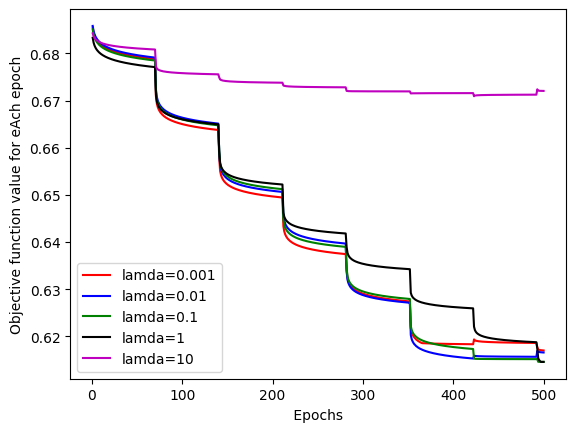

In [46]:
epochs=np.arange(1,501,1)
plt.plot(epochs, objval_epoch_lamda[0],  color='r', label='lamda=0.001')
plt.plot(epochs, objval_epoch_lamda[1],  color='b', label='lamda=0.01')
plt.plot(epochs, objval_epoch_lamda[2],  color='g', label='lamda=0.1')
plt.plot(epochs, objval_epoch_lamda[3],  color='k', label='lamda=1')
plt.plot(epochs, objval_epoch_lamda[4],  color='m', label='lamda=10')


plt.xlabel(" Epochs ")
plt.ylabel("Objective function value for eAch epoch")
plt.legend()

plt.show()

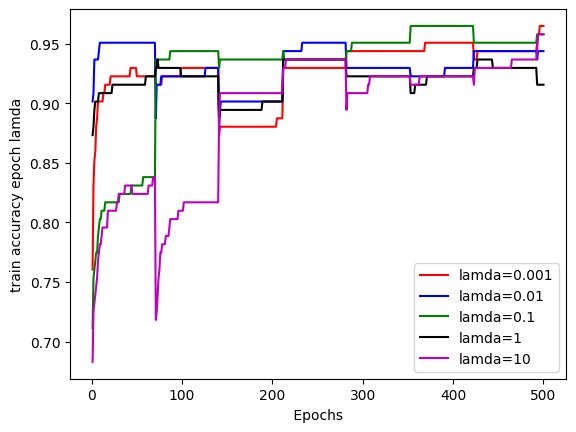

In [47]:
epochs=np.arange(1,501,1)
plt.plot(epochs, train_acc_epoch_lamda[0],  color='r', label='lamda=0.001')
plt.plot(epochs, train_acc_epoch_lamda[1],  color='b', label='lamda=0.01')
plt.plot(epochs, train_acc_epoch_lamda[2],  color='g', label='lamda=0.1')
plt.plot(epochs, train_acc_epoch_lamda[3],  color='k', label='lamda=1')
plt.plot(epochs, train_acc_epoch_lamda[4],  color='m', label='lamda=10')


plt.xlabel(" Epochs ")
plt.ylabel("train accuracy epoch lamda")
plt.legend()

plt.show()

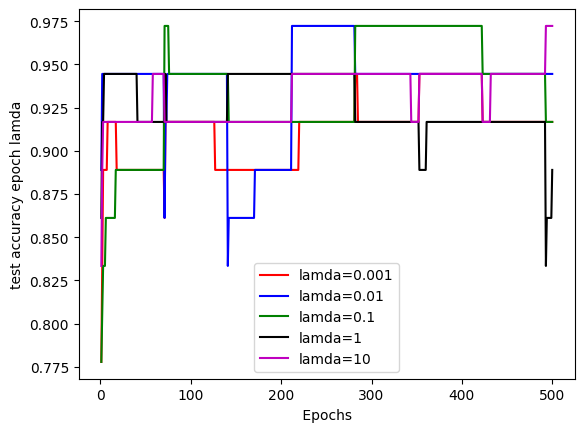

In [48]:
epochs=np.arange(1,501,1)
plt.plot(epochs, test_acc_epoch_lamda[0],  color='r', label='lamda=0.001')
plt.plot(epochs, test_acc_epoch_lamda[1],  color='b', label='lamda=0.01')
plt.plot(epochs, test_acc_epoch_lamda[2],  color='g', label='lamda=0.1')
plt.plot(epochs, test_acc_epoch_lamda[3],  color='k', label='lamda=1')
plt.plot(epochs, test_acc_epoch_lamda[4],  color='m', label='lamda=10')


plt.xlabel(" Epochs ")
plt.ylabel("test accuracy epoch lamda")
plt.legend()

plt.show()

In [49]:
import pandas as pd
data=[]
for i in range(len(lamda)):
  data.append([lamda[i],final_test_acc[i],final_train_acc[i]])

In [50]:
df = pd.DataFrame(data, columns = ['lamda values','final test accuracy','final train accuracy'])

In [51]:
df

lamda values  final test accuracy  final train accuracy
0         0.001             0.916667              0.964789
1         0.010             0.944444              0.943662
2         0.100             0.916667              0.957746
3         1.000             0.888889              0.915493
4        10.000             0.972222              0.957746

In [52]:
from tabulate import tabulate
print(tabulate(df.to_numpy(),headers=df.columns))

  lamda values    final test accuracy    final train accuracy
--------------  ---------------------  ----------------------
         0.001               0.916667                0.964789
         0.01                0.944444                0.943662
         0.1                 0.916667                0.957746
         1                   0.888889                0.915493
        10                   0.972222                0.957746


**Observation :-**

The test accuracy of the model is highest for lambda values 10, which have a test accuracy of 0.972222

The train accuracy of the model is highest for lambda values 10 , which have a train accuracy of 0.957746

For lambda values 10 , the train accuracy is lower compared to other values of lambda.

This suggests that for lambda values 10, the model is not fitting the training data well enough, and hence, the test accuracy is lower than other values of lambda.

As the value of lambda increases, the model's ability to fit the training data decreases, which can lead to a decrease in train accuracy, but it can help the model to generalize better to unseen data, leading to an increase in test accuracy.

The best value of lambda depends on the specific problem and the dataset, and it's common to use cross-validation to find the best value of lambda.

In summary, the given data suggests that increasing the value of lambda can help to improve the model's generalization performance, but too much regularization can lead to underfitting. The best value of lambda should be selected based on cross-validation and other techniques to ensure optimal model performance.

## optimisation using modified stopping criteria

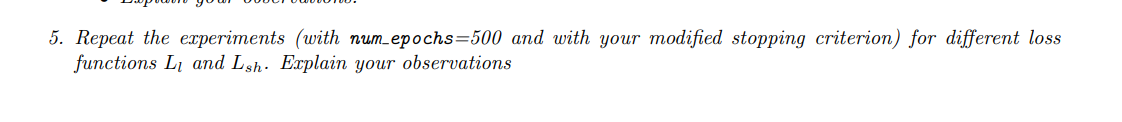

## Hinge loss

In [53]:
def OPT1_H(data,label,lamda,tol,num_epochs,test_data,test_label):
  t = 1
  epoch=0
  d=data.shape[1]
  N=data.shape[0]
  objfun_val=[]
  test_acc=[]
  train_acc=[]
  g_i_x=1000
  w = np.zeros((d,1)).reshape(d,1)
  arr = np.arange(N)
  while (np.linalg.norm(g_i_x)> tol and epoch <= num_epochs):
    np.random.shuffle(arr)
    for i in np.nditer(arr):
      step=1/t
      g_i_x=compute_grad_loss_h(data,label,w,i,lamda)
      w1=w-step*g_i_x
      w=compute_orthogonal_projection(w1)
      t = t+1
      if t>10000:
        t = 1
    epoch+=1
    objfun_val.append(compute_objfnval(data,label,w,lamda))
    test_acc.append(compute_accuracy(test_data,test_label,w))
    train_acc.append(compute_accuracy(data,label,w))
  return w,objfun_val,test_acc,train_acc,epoch

In [54]:
tol=1e-11
num_epochs=500
lamda = [10**(-3)]
object_epoch_lamda=[]
test_acc_epoch_lamda=[]
final_train_acc=[]
final_test_acc=[]
train_acc_epoch_lamda=[]
for i in range(len(lamda)):
  values=OPT1_H(train_data,train_label,lamda[i], tol,num_epochs,test_data,test_label)
  object_epoch_lamda.append(values[1])
  test_acc_epoch_lamda.append(values[2])
  train_acc_epoch_lamda.append(values[3])
  final_test_acc.append(compute_accuracy(test_data,test_label,values[0]))
  final_train_acc.append(compute_accuracy(train_data,train_label,values[0]))
obj_val_epoch_lamda=np.array(object_epoch_lamda).reshape(1,values[4])
test_accuracy_epoch_lamda=np.array(test_acc_epoch_lamda).reshape(1,values[4])
train_accuracy_epoch_lamda=np.array(train_acc_epoch_lamda).reshape(1,values[4])

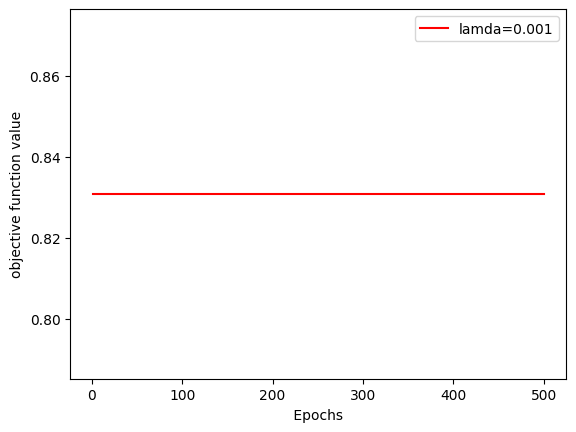

In [55]:
epochs=np.arange(1,values[4],1)
plt.plot(epochs, obj_val_epoch_lamda[0][:-1],  color='r', label='lamda=0.001')
#plt.plot(epochs, obj_val_epoch_lamda[1][:-1],  color='b', label='lamda=0.01')
#plt.plot(epochs, obj_val_epoch_lamda[2][:-1],  color='g', label='lamda=0.1')
#plt.plot(epochs, obj_val_epoch_lamda[3][:-1],  color='k', label='lamda=1')
#plt.plot(epochs, obj_val_epoch_lamda[4][:-1],  color='m', label='lamda=10')


plt.xlabel(" Epochs ")
plt.ylabel("objective function value")
plt.legend()

plt.show()

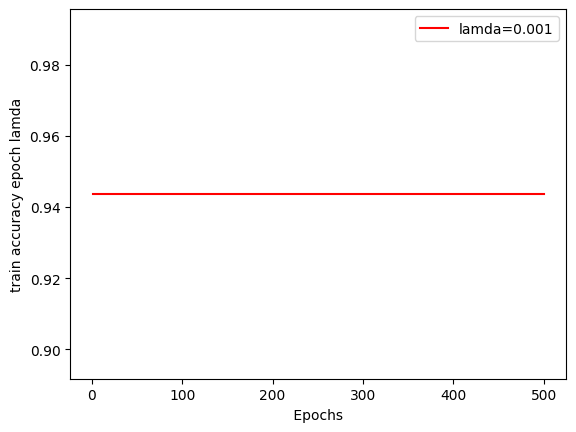

In [56]:
epochs=np.arange(1,values[4],1)
plt.plot(epochs, train_acc_epoch_lamda[0][:-1],  color='r', label='lamda=0.001')
# plt.plot(epochs, train_acc_epoch_lamda[1][:-1],  color='b', label='lamda=0.01')
# plt.plot(epochs, train_acc_epoch_lamda[2][:-1],  color='g', label='lamda=0.1')
# plt.plot(epochs, train_acc_epoch_lamda[3][:-1],  color='k', label='lamda=1')
# plt.plot(epochs, train_acc_epoch_lamda[4][:-1],  color='m', label='lamda=10')


plt.xlabel(" Epochs ")
plt.ylabel("train accuracy epoch lamda")
plt.legend()

plt.show()

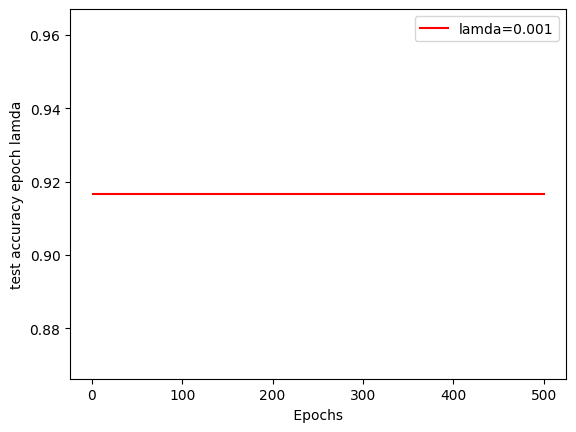

In [57]:
epochs=np.arange(1,values[4],1)
plt.plot(epochs, test_acc_epoch_lamda[0][:-1],  color='r', label='lamda=0.001')
# plt.plot(epochs, test_acc_epoch_lamda[1][:-1],  color='b', label='lamda=0.01')
# plt.plot(epochs, test_acc_epoch_lamda[2][:-1],  color='g', label='lamda=0.1')
# plt.plot(epochs, test_acc_epoch_lamda[3][:-1],  color='k', label='lamda=1')
# plt.plot(epochs, test_acc_epoch_lamda[4][:-1],  color='m', label='lamda=10')
plt.xlabel(" Epochs ")
plt.ylabel("test accuracy epoch lamda")
plt.legend()
plt.show()

In [58]:
data=[]
for i in range(len(lamda)):
  data.append([lamda[i],final_test_acc[i],final_train_acc[i]])

In [59]:
df = pd.DataFrame(data, columns = ['lamda values','final test acc','final train acc'])
df

lamda values  final test acc  final train acc
0         0.001        0.916667         0.943662

In [60]:
from tabulate import tabulate
print(tabulate(df.to_numpy(),headers=df.columns))

  lamda values    final test acc    final train acc
--------------  ----------------  -----------------
         0.001          0.916667           0.943662


## Logistic loss with modified stopping criteria

In [61]:
def OPT1_L(data,label,lamda, tol,num_epochs,test_data,test_label):
  t = 1
  epoch=0
  d=data.shape[1]
  N=data.shape[0]
  obj_fun_val=[]
  test_acc=[]
  train_acc=[]
  g_i_x=1000
  w = np.zeros((d,1)).reshape(d,1)
  arr = np.arange(N)
  while np.linalg.norm(g_i_x)>tol and epoch <=num_epochs:
    np.random.shuffle(arr)
    for i in np.nditer(arr):
      step=1/t
      g_i_x=compute_grad_loss_L(data,label,w,i,lamda)
      w1=w-step*g_i_x
      w=compute_orthogonal_projection(w1)
      t = t+1
      if t>10000:
        t = 1
    epoch+=1
    obj_fun_val.append(compute_objfnval_L(data,label,w,lamda))
    test_acc.append(compute_accuracy(test_data,test_label,w))
    train_acc.append(compute_accuracy(data,label,w))
  return w,obj_fun_val,test_acc,train_acc,epoch

In [62]:
tol=1e-11
num_epochs=500
lamda = [10**(-3)]
objval_epoch_lamda=[]
test_acc_epoch_lamda=[]
final_train_acc=[]
final_test_acc=[]
train_acc_epoch_lamda=[]
for i in range(len(lamda)):
  values=OPT1_L(train_data,train_label,lamda[i], tol,num_epochs,test_data,test_label)
  objval_epoch_lamda.append(values[1])
  test_acc_epoch_lamda.append(values[2])
  train_acc_epoch_lamda.append(values[3])
  final_test_acc.append(compute_accuracy(test_data,test_label,values[0]))
  final_train_acc.append(compute_accuracy(train_data,train_label,values[0]))
obj_val_epoch_lamda=np.array(obj_val_epoch_lamda).reshape(1,values[4])
test_acc_epoch_lamda=np.array(test_accuracy_epoch_lamda).reshape(1,values[4])
train_acc_epoch_lamda=np.array(train_accuracy_epoch_lamda).reshape(1,values[4])

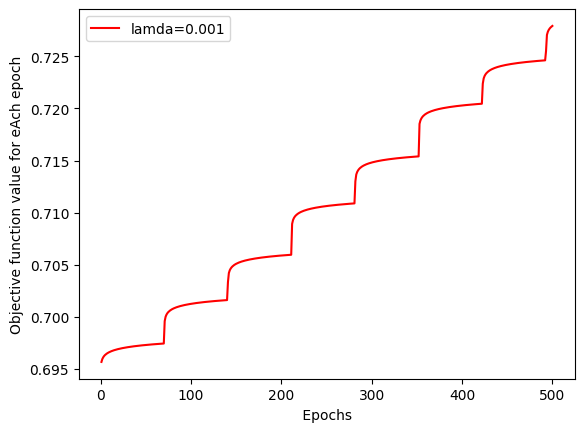

In [63]:
epochs=np.arange(1,values[4],1)
plt.plot(epochs, objval_epoch_lamda[0][:-1],  color='r', label='lamda=0.001')
# plt.plot(epochs, objval_epoch_lamda[1][:-1],  color='b', label='lamda=0.01')
# plt.plot(epochs, objval_epoch_lamda[2][:-1],  color='g', label='lamda=0.1')
# plt.plot(epochs, objval_epoch_lamda[3][:-1],  color='k', label='lamda=1')
# plt.plot(epochs, objval_epoch_lamda[4][:-1],  color='m', label='lamda=10')


plt.xlabel(" Epochs ")
plt.ylabel("Objective function value for eAch epoch")
plt.legend()

plt.show()

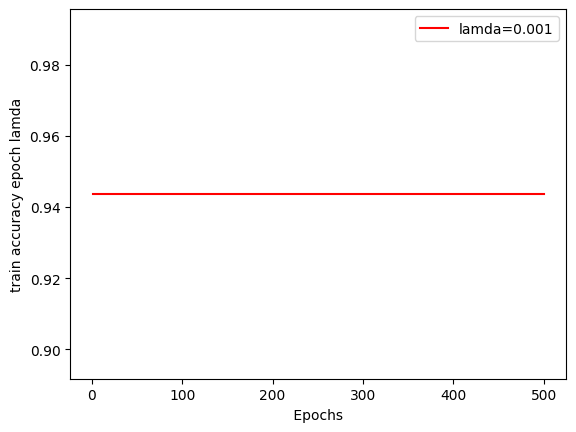

In [64]:
epochs=np.arange(1,values[4],1)
plt.plot(epochs, train_acc_epoch_lamda[0][:-1],  color='r', label='lamda=0.001')
# plt.plot(epochs, train_acc_epoch_lamda[1][:-1],  color='b', label='lamda=0.01')
# plt.plot(epochs, train_acc_epoch_lamda[2][:-1],  color='g', label='lamda=0.1')
# plt.plot(epochs, train_acc_epoch_lamda[3][:-1],  color='k', label='lamda=1')
# plt.plot(epochs, train_acc_epoch_lamda[4][:-1],  color='m', label='lamda=10')
plt.xlabel(" Epochs ")
plt.ylabel("train accuracy epoch lamda")
plt.legend()
plt.show()

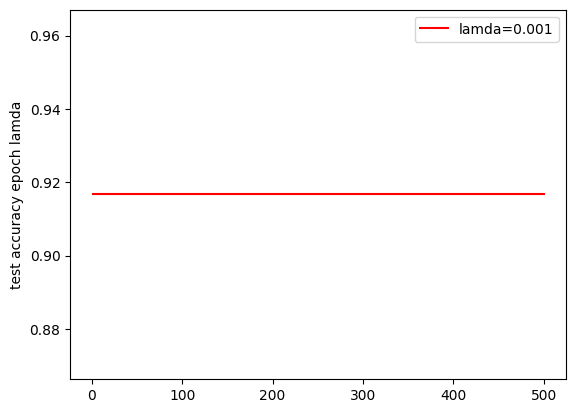

In [65]:
epochs=np.arange(1,values[4],1)
plt.plot(epochs, test_acc_epoch_lamda[0][:-1],  color='r', label='lamda=0.001')
# plt.plot(epochs, test_acc_epoch_lamda[1][:-1],  color='b', label='lamda=0.01')
# plt.plot(epochs, test_acc_epoch_lamda[2][:-1],  color='g', label='lamda=0.1')
# plt.plot(epochs, test_acc_epoch_lamda[3][:-1],  color='k', label='lamda=1')
# plt.plot(epochs, test_acc_epoch_lamda[4][:-1],  color='m', label='lamda=10')
# plt.xlabel(" Epochs ")
plt.ylabel("test accuracy epoch lamda")
plt.legend()
plt.show()

In [66]:

data=[]
for i in range(len(lamda)):
  data.append([lamda[i],final_test_acc[i],final_train_acc[i]])
df = pd.DataFrame(data, columns = ['lamda values','final test accuracy','final train accuracy'])
df

lamda values  final test accuracy  final train accuracy
0         0.001             0.055556              0.105634

In [67]:
from tabulate import tabulate
print(tabulate(df.to_numpy(),headers=df.columns))

  lamda values    final test accuracy    final train accuracy
--------------  ---------------------  ----------------------
         0.001              0.0555556                0.105634


##squared hinge loss (modified stopping criteria)

In [68]:
def OPT1_Sqh(data,label,lamda, tol,num_epochs,test_data,test_label):
  t = 1
  epoch=0
  d=data.shape[1]
  N=data.shape[0]
  obj_fun_val=[]
  test_acc=[]
  train_acc=[]
  w = np.zeros((d,1)).reshape(d,1)
  arr = np.arange(N)
  g_i_x=1000
  while np.linalg.norm(g_i_x) > tol and epoch <= num_epochs:
    np.random.shuffle(arr)
    for i in np.nditer(arr):
      step=1/t
      g_i_x=compute_grad_loss_Sqh(data,label,w,i,lamda)
      w1=w-step*g_i_x
      w=compute_orthogonal_projection(w1)
      t = t+1
      if t>10000:
        t = 1
    epoch+=1
    obj_fun_val.append(compute_objfnval_L(data,label,w,lamda))
    test_acc.append(compute_accuracy(test_data,test_label,w))
    train_acc.append(compute_accuracy(data,label,w))
  return w,obj_fun_val,test_acc,train_acc,epoch


In [69]:
tol=1e-14
num_epochs=500
lamda = [1]
objval_epoch_lamda=[]
test_acc_epoch_lamda=[]
final_train_acc=[]
final_test_acc=[]
train_acc_epoch_lamda=[]
for i in range(len(lamda)):
  values=OPT1_Sqh(train_data,train_label,lamda[i], tol,num_epochs,test_data,test_label)
  objval_epoch_lamda.append(values[1])
  test_acc_epoch_lamda.append(values[2])
  train_acc_epoch_lamda.append(values[3])
  final_test_acc.append(compute_accuracy(test_data,test_label,values[0]))
  final_train_acc.append(compute_accuracy(train_data,train_label,values[0]))
obj_val_epoch_lamda=np.array(obj_val_epoch_lamda).reshape(1,values[4])
test_acc_epoch_lamda=np.array(test_accuracy_epoch_lamda).reshape(1,values[4])
train_acc_epoch_lamda=np.array(train_accuracy_epoch_lamda).reshape(1,values[4])

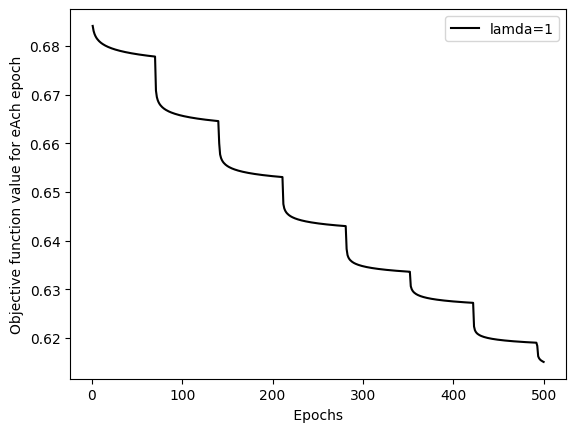

In [70]:
epochs=np.arange(1,values[4],1)
# plt.plot(epochs, objval_epoch_lamda[0][:-1],  color='r', label='lamda=0.001')
# plt.plot(epochs, objval_epoch_lamda[0][:-1],  color='b', label='lamda=0.01')
# plt.plot(epochs, objval_epoch_lamda[2][:-1],  color='g', label='lamda=0.1')
plt.plot(epochs, objval_epoch_lamda[0][:-1],  color='k', label='lamda=1')
# plt.plot(epochs, objval_epoch_lamda[4][:-1],  color='m', label='lamda=10')


plt.xlabel(" Epochs ")
plt.ylabel("Objective function value for eAch epoch")
plt.legend()

plt.show()

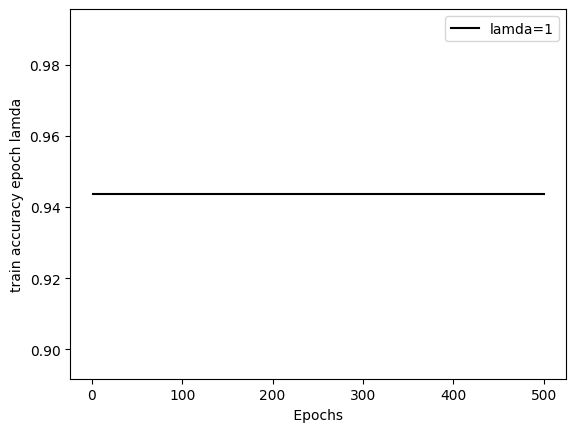

In [71]:
epochs=np.arange(1,values[4],1)
# plt.plot(epochs, train_acc_epoch_lamda[0][:-1],  color='r', label='lamda=0.001')
#plt.plot(epochs, train_acc_epoch_lamda[0][:-1],  color='b', label='lamda=0.01')
# plt.plot(epochs, train_acc_epoch_lamda[2][:-1],  color='g', label='lamda=0.1')
plt.plot(epochs, train_acc_epoch_lamda[0][:-1],  color='k', label='lamda=1')
# plt.plot(epochs, train_acc_epoch_lamda[4][:-1],  color='m', label='lamda=10')


plt.xlabel(" Epochs ")
plt.ylabel("train accuracy epoch lamda")
plt.legend()

plt.show()

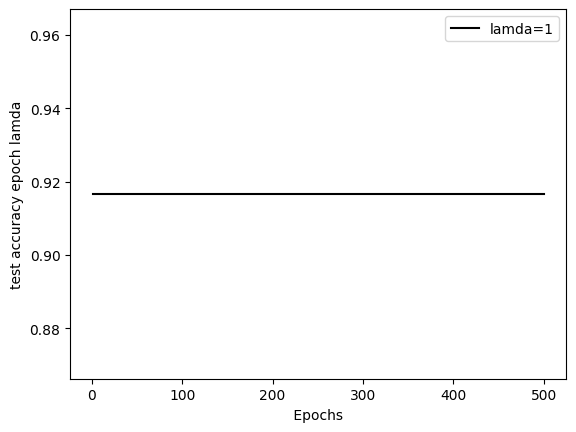

In [72]:
epochs=np.arange(1,values[4],1)
#plt.plot(epochs, test_acc_epoch_lamda[0][:-1],  color='r', label='lamda=0.001')
#plt.plot(epochs, test_acc_epoch_lamda[0][:-1],  color='b', label='lamda=0.01')
# plt.plot(epochs, test_acc_epoch_lamda[2][:-1],  color='g', label='lamda=0.1')
plt.plot(epochs, test_acc_epoch_lamda[0][:-1],  color='k', label='lamda=1')
# plt.plot(epochs, test_acc_epoch_lamda[4][:-1],  color='m', label='lamda=10')


plt.xlabel(" Epochs ")
plt.ylabel("test accuracy epoch lamda")
plt.legend()

plt.show()

In [73]:
import pandas as pd
data=[]
for i in range(len(lamda)):
  data.append([lamda[i],final_test_acc[i],final_train_acc[i]])

In [74]:
df = pd.DataFrame(data, columns = ['lamda values','final test accuracy','final train accuracy'])

In [75]:
df

lamda values  final test accuracy  final train accuracy
0             1             0.916667              0.950704

In [76]:
from tabulate import tabulate
print(tabulate(df.to_numpy(),headers=df.columns))

  lamda values    final test accuracy    final train accuracy
--------------  ---------------------  ----------------------
             1               0.916667                0.950704


**observation** by modifing our stopping criteria as norm of gradient or sub-gradient less than tolerance value,

 i have taken tolerance value as $10^{-14}$

 here we see that the accuracy also dependent on the value of the value of the tolerancy , if the tolerance value take greater than tha $10^{-10}$ then the accuracy is decrease and if we take less than the $10^{-15}$ then accuracy is also descrase , then we take the tolerancy $10^{-14}$  which give the higher accuracy as we seen in the above table .